# Mini Curso de Python


## Pandas

In [12]:
#Para usar o Pandas, é necessário importar a biblioteca
import pandas as pd

#Para esse notebook  precisaremos também do matplotlib e do numpy
import numpy as np
import matplotlib as plt

## Séries
  
Existem dois tipos principais de estruturas de dados no pandas: as séries e os dataframes
  
As série é  como um array unidimensional, uma lista de valores. Toda Series possui um índice, o index, que dá rótulos a cada elemento da lista. 

In [6]:
#Series notas, o index desta Series é a coluna à esquerda, 
#que vai de 0 a 4 neste caso, que o pandas criou automaticamente, 
#já que não especificamos uma lista de rótulos.


notas = pd.Series([2,7,5,10,6])
print(notas)

0     2
1     7
2     5
3    10
4     6
dtype: int64
[ 2  7  5 10  6]
RangeIndex(start=0, stop=5, step=1)


In [7]:
#Já podemos aqui verificar os atributos da nossa Series, 
#comecemos pelos valores e o índice, os dois atributos fundamentais nesta estrutura:
print(notas.values)
print(notas.index)

[ 2  7  5 10  6]
RangeIndex(start=0, stop=5, step=1)


In [8]:
#Como ao criar a Series não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão.
#Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, 
#poderíamos atribuir nomes ao index:

notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
print(notas)

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
dtype: int64


In [9]:
#O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:
print(notas['Julia'])

10


In [10]:
#Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas
#sobre os valores, como média .mean() e desvio padrão .std()
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())


Média: 6.0
Desvio padrão: 2.9154759474226504


In [11]:
#Geralmente para resumir brevemente as estatísticas dos dados se usa o .describe()
print(notas.describe())

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64


In [13]:
#A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e 
#funções matemáticas do numpy diretamente

print(notas**2)
print(np.log(notas))

Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
dtype: int64
Wilfred    0.693147
Abbie      1.945910
Harry      1.609438
Julia      2.302585
Carrie     1.791759
dtype: float64


## DataFrame
  
Um DataFrame é uma estrutura bidimensional de dados, como uma planilha

In [15]:
# Abaixo criaremos um DataFrame que possui valores de diferentes tipos, 
#usando um dicionário como entrada dos dados

df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
print(df)

     Aluno  Faltas  Prova  Seminário
0  Wilfred       3      2        8.5
1    Abbie       4      7        7.5
2    Harry       2      5        9.0
3    Julia       1     10        7.5
4   Carrie       4      6        8.0


In [18]:
#Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:
print(df.dtypes)

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object


In [19]:
#É possível acessar a lista de colunas

print(df.columns)


Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')


In [20]:
#Os nomes das colunas podem ser usadas pra acessar seus valores:

print(df["Seminário"])

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminário, dtype: float64


In [60]:
#Quantidade de linhas e colunas do DataFrame
print(df.shape)

(1997, 8)


In [61]:
##Descrição do Index
print(df.index )

RangeIndex(start=0, stop=1997, step=1)


In [62]:
#Contagem de dados não-nulos
print(df.count())

condominio    1997
quartos       1997
suites        1997
vagas         1997
area          1997
bairro        1997
preco         1997
pm2           1997
dtype: int64


In [21]:
#.describe() também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:
print(df.describe())

        Faltas      Prova  Seminário
count  5.00000   5.000000    5.00000
mean   2.80000   6.000000    8.10000
std    1.30384   2.915476    0.65192
min    1.00000   2.000000    7.50000
25%    2.00000   5.000000    7.50000
50%    3.00000   6.000000    8.00000
75%    4.00000   7.000000    8.50000
max    4.00000  10.000000    9.00000


In [22]:
#Também é possível ordenar por uma determinada coluna
df.sort_values(by="Seminário")

Aluno  Faltas  Prova  Seminário
1    Abbie       4      7        7.5
3    Julia       1     10        7.5
4   Carrie       4      6        8.0
0  Wilfred       3      2        8.5
2    Harry       2      5        9.0

In [24]:
#Para selecionar um valor específico usa-se o atributo .loc:

df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

In [25]:
#Para selecionar de acordo com critérios condicionais, se usa o que se chama de Boolean Indexing.

df[df["Seminário"] > 8.0]

Aluno  Faltas  Prova  Seminário
0  Wilfred       3      2        8.5
2    Harry       2      5        9.0

In [26]:
#Este tipo de indexação também possibilita checar condições de múltiplas colunas
#Os operadores serão:
# | para ou
# & para and
# ~ para not

df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

Aluno  Faltas  Prova  Seminário
2  Harry       2      5        9.0

## Leitura de Dados
  
O pandas nos fornece uma série de funcionalidades de leitura de dados, para os mais diversos formatos estruturais de dados, entre eles estão:  
- pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas
- pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.
- pd.read_html, para ler tabelas diretamente de um website


In [27]:
#Usaremos como exemplo um arquivo csv chamado dados.csv que são  sobre preços de apartamentos 
#em 7 bairros da cidade do Rio de Janeiro: Botafogo, Copacabana, Gávea, Grajaú, Ipanema, Leblon, Tijuca

df = pd.read_csv("dados.csv")
print(df)

      condominio  quartos  suites  vagas  area    bairro    preco       pm2
0            350        1     0.0    1.0    21  Botafogo   340000  16190.48
1            800        1     0.0    1.0    64  Botafogo   770000  12031.25
2            674        1     0.0    1.0    61  Botafogo   600000   9836.07
3            700        1     1.0    1.0    70  Botafogo   700000  10000.00
4            440        1     0.0    1.0    44  Botafogo   515000  11704.55
5            917        1     1.0    1.0    60  Botafogo   630000  10500.00
6            850        1     1.0    1.0    65  Botafogo   740000  11384.62
7            350        1     1.0    1.0    43  Botafogo   570000  13255.81
8            440        1     1.0    1.0    26  Botafogo   430000  16538.46
9            510        1     1.0    1.0    42  Botafogo   500000  11904.76
10           200        1     0.0    1.0    35  Botafogo   500000  14285.71
11           552        1     1.0    1.0    67  Botafogo   790000  11791.04
12          

In [28]:
#Para imprimir as primeiras linhas do dataframe, pode-se usar o comando head()

print(df.head())

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55


In [29]:
#Se desejar imprimir mais linhas que a quantidade padrão (5) basta colocar o parâmetro n=x

print(df.head(n=10))

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55
5         917        1     1.0    1.0    60  Botafogo  630000  10500.00
6         850        1     1.0    1.0    65  Botafogo  740000  11384.62
7         350        1     1.0    1.0    43  Botafogo  570000  13255.81
8         440        1     1.0    1.0    26  Botafogo  430000  16538.46
9         510        1     1.0    1.0    42  Botafogo  500000  11904.76


In [30]:
#Com comportamento semelhante, o caomando tail imprime as última linhas

print(df.tail(n=10))

      condominio  quartos  suites  vagas  area  bairro    preco      pm2
1987         880        3     1.0    1.0   100  Tijuca   800000  8000.00
1988         870        3     1.0    1.0   100  Tijuca   580000  5800.00
1989         400        3     1.0    1.0    92  Tijuca   480000  5217.39
1990         686        3     0.0    1.0   105  Tijuca   490000  4666.67
1991         450        3     1.0    1.0    72  Tijuca   435000  6041.67
1992        1080        3     1.0    1.0    80  Tijuca   680000  8500.00
1993         750        3     0.0    1.0    82  Tijuca   650000  7926.83
1994         700        3     1.0    1.0   100  Tijuca   629900  6299.00
1995        1850        3     1.0    2.0   166  Tijuca  1600000  9638.55
1996         800        3     1.0    1.0   107  Tijuca   540000  5046.73


In [32]:
#O comando unique lista os valores únicos de uma coluna

print(df["bairro"].unique())

['Botafogo' 'Copacabana' 'Gávea' 'Grajaú' 'Ipanema' 'Leblon' 'Tijuca']


In [33]:
#O comando value_counts() mostra o quantitativo para cada valor único
print(df["bairro"].value_counts())

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64


In [35]:
#Os valores contados podem ser normalizados para expressar percentual

print(df["bairro"].value_counts(normalize=True)*100)


Copacabana    17.325989
Tijuca        17.075613
Botafogo      15.373060
Ipanema       14.071107
Leblon        14.021032
Grajaú        11.867802
Gávea         10.265398
Name: bairro, dtype: float64


In [36]:
#Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o .groupby().

print(df.groupby("bairro").mean())

             condominio   quartos    suites     vagas        area  \
bairro                                                              
Botafogo     914.475570  2.107492  1.048860  1.159609   83.837134   
Copacabana   991.861272  2.101156  1.034682  1.080925  101.855491   
Grajaú       619.940928  2.097046  0.970464  1.130802   79.949367   
Gávea        985.234146  2.058537  1.029268  1.200000   88.497561   
Ipanema     1357.120996  2.181495  1.192171  1.220641  100.615658   
Leblon      1260.010714  2.207143  1.064286  1.164286   91.832143   
Tijuca       681.175953  2.131965  0.944282  1.143695   81.457478   

                   preco           pm2  
bairro                                  
Botafogo    1.010614e+06  12034.486189  
Copacabana  1.216344e+06  11965.298699  
Grajaú      4.788869e+05   6145.624473  
Gávea       1.454571e+06  16511.582780  
Ipanema     2.033096e+06  19738.407794  
Leblon      1.946193e+06  20761.351036  
Tijuca      5.750780e+05   7149.804985  


In [38]:
#No exemplo abaixo, foram extraidos dados de uma coluna
#Foi obtida os valores da média do preço do metro quadrado em ordem crescente

print(df.groupby("bairro").mean()["pm2"].sort_values())

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64


In [40]:
#Para aplicar uma função qualquer aos dados, o comando é  .apply

def truncar(bairro):
    return bairro[:3]

print(df["bairro"].apply(truncar).head(n=10))


0    Bot
1    Bot
2    Bot
3    Bot
4    Bot
5    Bot
6    Bot
7    Bot
8    Bot
9    Bot
Name: bairro, dtype: object


In [41]:
#Criar um dataset a partir de outro

df2 = df.head()
print(df2)

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55


In [43]:
#O comando replace substitui um valor específico por outro.
#Para exemplificar vamos usar o Not a Number (Nan) do numpy para vermos algumas aplicações

df2 = df2.replace({"pm2": {12031.25: np.nan}})
print(df2)

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000       NaN
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55


In [46]:
#O comando dropna() elimina linhas que tenha o NaN

print(df2.dropna())

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55


In [47]:
#Pode-se ainda substituir todos os valores NaN por um outro valor qualquer

print(df2.fillna(99))

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000     99.00
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55


In [48]:
#Para exibir quais valores são NaN

print(df2.isna())

   condominio  quartos  suites  vagas   area  bairro  preco    pm2
0       False    False   False  False  False   False  False  False
1       False    False   False  False  False   False  False   True
2       False    False   False  False  False   False  False  False
3       False    False   False  False  False   False  False  False
4       False    False   False  False  False   False  False  False


## Visualização de Dados  

Partiremos agora para visualização de dados com o pandas.  
Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados. 
O método .plot() pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente .hist(), .area(), .pie() e .scatter(), além de vários outros.


In [50]:
#Para plotar um histograma basta usar o plot.hist
#Esse comando, por padrão, usa 10 bins, ou seja, divide os dados em 10 partes

df["preco"].plot.hist()

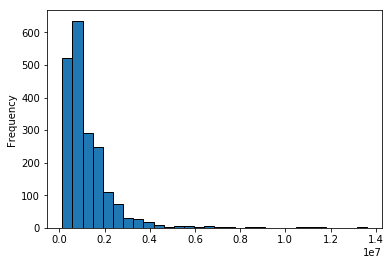

In [51]:
#Abaixo, além de especificar a quantidade de bins, também é especificada cor das bordas como preta,
#que por padrão é transparente.

df["preco"].plot.hist(bins=30, edgecolor='black')

In [52]:
#Plotando um gráfico de barras a partir de Bairros

df["bairro"].value_counts().plot.bar()

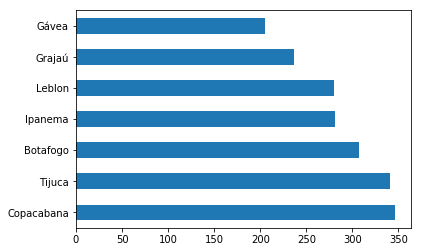

In [53]:
#Agora, um gráfico de barras horizontais

df["bairro"].value_counts().plot.barh()


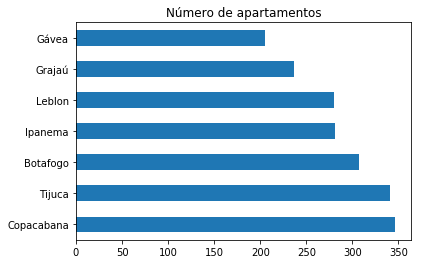

In [54]:
#È possível colocar um título no gráfico

df["bairro"].value_counts().plot.barh(title="Número de apartamentos")


In [55]:
#Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se
#quais colunas usar como dados no eixo x e y:

df.plot.scatter(x='preco', y='area')


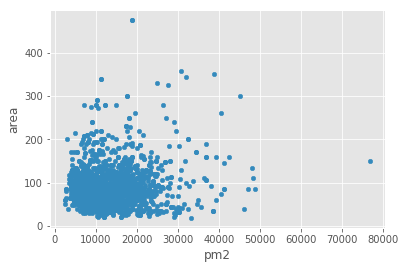

In [56]:
#É possível usar os styles do matplotlib

plt.style.use('ggplot')
df.plot.scatter(x='pm2', y='area')


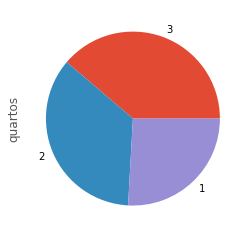

In [57]:
#Fazendo um gráfico de pizza

df["quartos"].value_counts().plot.pie()

## Para Salvar

- Assim como se lê um arquivo é possível salvar em arquivo o dataframe.
- Basta usar o mesmo comando só que 'to' ao invés de 'read'


In [59]:
#Para salvar nosso segundo dataframe, podemos fazer assim

df2.to_csv("exercicio.csv")

print(pd.read_csv("exercicio.csv"))

   Unnamed: 0  condominio  quartos  suites  vagas  area    bairro   preco  \
0           0         350        1     0.0    1.0    21  Botafogo  340000   
1           1         800        1     0.0    1.0    64  Botafogo  770000   
2           2         674        1     0.0    1.0    61  Botafogo  600000   
3           3         700        1     1.0    1.0    70  Botafogo  700000   
4           4         440        1     0.0    1.0    44  Botafogo  515000   

        pm2  
0  16190.48  
1       NaN  
2   9836.07  
3  10000.00  
4  11704.55  
